In [24]:
from BA_Optimization_ML.Optimization.helper_functions import splitcurve as sp
from BA_Optimization_ML.Optimization.helper_functions import Polynomial as pl
from BA_Optimization_ML.Optimization.helper_functions import input_drawing_track as in_track
from BA_Optimization_ML.Optimization.helper_functions import plot_track as plt_T
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from scipy.integrate import quad
from scipy.optimize import newton
import math


drawing = False # true if mouse is pressed
mode = False # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
listy=[]
listx=[]

steps=100

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    global listx, listy
    
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
                listx.append(x)
                listy.append(-y)            
                
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
            

In [3]:

def createImg():
    global listy,listx,img,pic
    listy=[]
    listx=[]

    img = np.zeros((512,512,3), np.uint8)
    pic=cv2.namedWindow('image')
    cv2.setMouseCallback('image',draw_circle)
    tempdrawing=drawing
    start=True
    while(start or drawing):
        cv2.imshow('image',img)
        k = cv2.waitKey(1) & 0xFF
        if k == ord('m'):
            mode = not mode
        elif k == 27:
            break

        if drawing:
            start=False

In [4]:
def prepCoor(pos):
    arrayPos=np.array(pos)
    arrayPos=arrayPos-arrayPos[0]
    return arrayPos.reshape(-1,1)

# Regression Model

In [35]:
def getcoef(lis,deg=4):
    sol=[]
    axes=["x","y"]
    for count,lis in enumerate(lis):
        X=np.linspace(0,1,len(lis)).reshape(-1,1)
        y=prepCoor(lis)
        polmodel = make_pipeline(PolynomialFeatures(deg),LinearRegression(normalize=True))
        polmodel.fit(X, y)
        
        score=polmodel.score(X,y)
        print('Accuracy List',axes[count]," :",score)
        sol.append(np.squeeze(polmodel.steps[1][1].coef_))
    return sol

# Creat & Plote Curve

In [30]:
class curve: 
    global step
    def __init__ (self,fx,fy,fx_dot=0,fy_dot=0):
        self.fx
        self.fx=fx
        self.fy=fy
        self.fx_dot=fx_dot
        self.fy_dot=fy_dot
        
        
    def fx(t,self):
        return self.fx(t)
    def fy(t,self):
        return self.fy(t)
    def fx_dot(t,self):
        return self.fx_dot(t)
    def fy_dot(t,self):
        return self.fy_dot(t)
    def pxy(self):
        return self.pxy
    
    
    def createList(self):
        global steps
        raceTrack= [np.array([self.fx(i),self.fy(i)])for i in np.linspace(0,1,steps)]
        
        self.pxy=sp.interpol_equal(raceTrack,steps)
        #pxy=pxy[:int(steps*0.8)]
        return self.pxy 
        
def set_Curve(coeff_X,coeff_Y):
    fx=pl.Polynomial(coeff_X)
    fy=pl.Polynomial(coeff_Y)
    
    #Integrate
    coeff_X_dot=[c*i for i,c in enumerate(coeff_X)]
    coeff_X_dot=coeff_X_dot[1:]
    
    coeff_Y_dot=[c*i for i,c in enumerate(coeff_Y)]
    coeff_Y_dot=coeff_Y_dot[1:]
    
    fx_dot=pl.Polynomial(coeff_X_dot)
    fy_dot=pl.Polynomial(coeff_Y_dot)
    
    return curve(fx,fy,fx_dot,fy_dot)
    
    
def plotcurve(curve):
    global steps;
    time=np.linspace(0,1,steps);
    plt.clf
    pxy=curve.createList()
    #print(pxy[0][:],pxy[1])
    
    fig, axs = plt.subplots(1,2)
    axs[0].plot(curve.fx(time[0]),curve.fy(time[0]),"g*",markersize=10)
    axs[0].plot(curve.fx(time[-1]),curve.fy(time[-1]),"ro",markersize=10)
    axs[0].plot(curve.fx(time),curve.fy(time),marker="o",markersize=3)
    axs[0].set_title("Kurve without equal Spacing")
    axs[0].legend(["Start","End","Curve"])

    

    X=([x[0] for x in pxy])
    Y=([y[1] for y in pxy])

    axs[1].plot(X[0],Y[0],"g*",markersize=10)
    axs[1].plot(X[-1],Y[-1],"ro",markersize=10)
    axs[1].plot(X,Y,marker="o",markersize=3)
    axs[1].set_title("Kurve with equal Spacing")
    axs[1].legend(["Start","End","Curve"])
    plt.show()
    


# Display Polynomial View

In [31]:
def drawTrack(curve=None,showPlot=True):
    if (curve is None):
        createImg()
        coef=getcoef([listx,listy],20)
        print("\nCoefficient X:\n",coef[0].T,"\n--------\nCoefficient Y:\n",coef[1])
        c=set_Curve(list(coef[0]),list(coef[1]))
        if showPlot:
            plotcurve(c)
    else:
        if showPlot:
            c=curve
            plotcurve(c)
    return c

Accuracy List x  : 0.9987308881608477
Accuracy List y  : 0.998731262197789

Coefficient X:
 [ 0.00000000e+00 -2.85198226e+01 -1.82860254e+04  2.04949342e+06
 -8.49813353e+07  1.88166890e+09 -2.59272511e+10  2.41525100e+11
 -1.60178553e+12  7.82777650e+12 -2.88495390e+13  8.14020459e+13
 -1.77345245e+14  2.99121722e+14 -3.89322096e+14  3.87093536e+14
 -2.88422712e+14  1.55804786e+14 -5.75928037e+13  1.30260153e+13
 -1.35909726e+12] 
--------
Coefficient Y:
 [ 0.00000000e+00 -1.39584570e+03  1.06689454e+05 -5.20818724e+06
  1.30906864e+08 -2.05206090e+09  2.19427463e+10 -1.68109363e+11
  9.50754888e+11 -4.04985128e+12  1.31772924e+13 -3.30603214e+13
  6.42725078e+13 -9.68499959e+13  1.12551325e+14 -9.97118926e+13
  6.59684978e+13 -3.14848872e+13  1.02140216e+13 -2.00968057e+12
  1.80322309e+11]


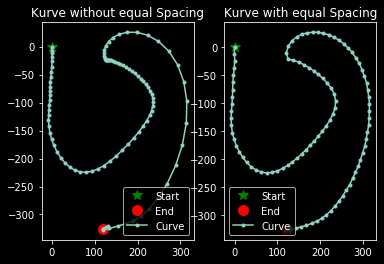

In [37]:
save=drawTrack()

#cv2.imshow("image",img)

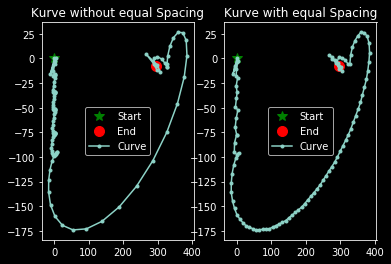

In [36]:
drawTrack(save)

Accuracy List x  : 0.9400713246017246
Accuracy List y  : 0.9752774581776354

Coefficient X:
 [    0.          -652.82790908  5364.18842346 -9082.37133342
  4608.92417087] 
--------
Coefficient Y:
 [    0.         -1385.19084026  3891.17964297 -3050.12696628
   633.48979272]
equallity befor:  0.023593344676719665
equallity after:  1.3064701871537185e-05
               X          Y
0       0.000000   0.000000
1      -0.256175  -0.544725
2      -0.511452  -1.089873
3      -0.765823  -1.635443
4      -1.019283  -2.181437
...          ...        ...
996   235.540668  89.761504
997   236.133891  89.659340
998   236.727080  89.556970
999   237.320233  89.454399
1000  237.913352  89.351629

[1001 rows x 2 columns]


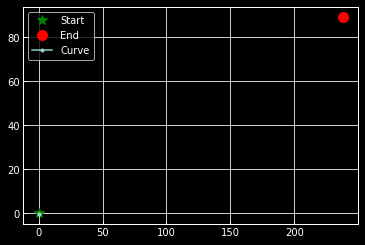

In [20]:
s=in_track.get_as_csv()
plt_T.plot_racetrack(s)

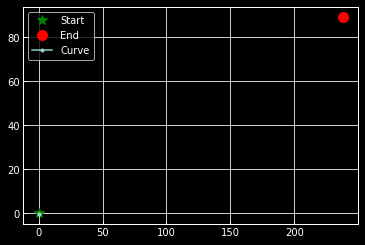

In [23]:
plt_T.plot_racetrack(s)